In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset,TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import pandas as pd
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
import torch.utils.data as data
from sklearn.model_selection import KFold


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
data = pd.read_csv('BBBP.csv')


In [4]:
data

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [5]:
print((data.iloc[:, 3][2049]))

[N+](=NCC(=O)N[C@@H]([C@H](O)C1=CC=C([N+]([O-])=O)C=C1)CO)=[N-]


In [6]:
length_char = []
for i in range(2050):
    length_char.append(len(data.iloc[:,3][i]))


In [7]:
unique_elements = len(set(length_char))
max_length = np.max(length_char)
min_length = np.min(length_char)
print(max_length)
print(min_length)
counter = Counter(length_char)
most_common_value = counter.most_common(1)[0][0]
print(most_common_value)

400
3
44


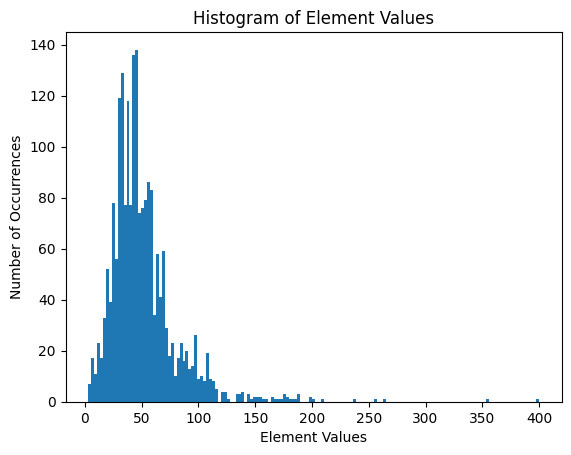

In [8]:
plt.hist(length_char, unique_elements)
plt.xlabel('Element Values')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Element Values')
plt.show()

In [9]:
smiles_combined = ''.join(data['smiles'])
token_counts = Counter(smiles_combined)
total_tokens = sum(token_counts.values())
token_diversity = len(token_counts)
print("Token Diversity:", token_diversity)
print("Token Occurrence Frequency:")
for token, count in token_counts.items():
    frequency = count / total_tokens
    print(f"{token}: {frequency}")

Token Diversity: 39
Token Occurrence Frequency:
[: 0.03296942817611493
C: 0.28811053619150506
l: 0.0058565986239836245
]: 0.03296942817611493
.: 0.0015447015788176872
(: 0.09942002615568317
): 0.09942002615568317
N: 0.03747085915733212
O: 0.058831333750307996
c: 0.06573984571937605
1: 0.039119804400977995
2: 0.03193646822463562
=: 0.07613578211178712
3: 0.02419400693694206
4: 0.013627490002084873
F: 0.004823638672504312
n: 0.004880498853319687
o: 0.00046435814332556247
@: 0.03974526638994712
H: 0.022668258751729498
S: 0.004833115369306875
5: 0.004302420348363374
\: 0.0019237694509201873
/: 0.0017437122116714997
s: 0.0006823221697844999
#: 0.0005022649305358125
B: 0.00049278823373325
r: 0.00048331153693068746
I: 5.6860180815374996e-05
+: 0.0011466803131100624
-: 0.0011656337067151874
6: 0.0011751104035177499
7: 0.0005306950209434999
8: 0.00026534751047174997
9: 0.00015162714884099998
a: 0.00020848732965637496
P: 0.00010424366482818748
%: 0.00022744072326149998
0: 7.581357442049999e-05


In [10]:
tokens = []
unique_elements = set(smiles_combined)
for i in unique_elements:
    tokens.append(i)

def one_hot_encode(x):
    code = np.zeros((39,39))
    if x == 'v':
        out = code[0]
    else:
        for j in range(39):
            code[j][j] = 1
        index = tokens.index(x)
        out = code[index]
    return torch.from_numpy(out)


In [11]:
dataset = torch.zeros(2050,400,39)

data_list = []

for j in range(2050):
    data_list.append(data.iloc[:,3][j])

for i in range(2050):
    data_list[i] = data_list[i][:400].ljust(400, 'v')

for z in range(2050):
    for i in range(400):
        dataset[z][i] = one_hot_encode(data_list[z][i])

In [12]:
labels = torch.zeros(2050)
for i in range(2050):
    labels[i] = data.iloc[:,2][i]

In [13]:
dataset[0][1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])

In [14]:
def training_data(model,num_epochs,train_loader,learn_rate):
    Loss_train=[]
    Loss_val=[]
    model.train()
    optimizer = optim.Adam(model.parameters(),lr=learn_rate)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        epoch_train_loss = 0.0
        correct_pred = 0
        total_samples = 0
        for input, labels in train_loader:
            optimizer.zero_grad()
            output = model(input)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
            total_samples += labels.size(0)
            preds = torch.argmax (output, dim=1)
            correct_pred += (preds == labels).sum().item()
        epoch_train_accuracy =  100 * correct_pred / total_samples
        Loss_val.append(epoch_train_accuracy)
        Loss_train.append(epoch_train_loss)
        print(f"Epoch {epoch+1} - Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%")

In [15]:
def testing_data(model,test_loader):
    total = 0
    correct_predict = 0
    model.eval()
    for inputt, labelz in test_loader:
        output = model(inputt)
        total += labelz.size(0)
        predict = torch.argmax (output, dim=1)
        correct_predict += (predict == labelz).sum().item()
    test_accuracy =  100 * correct_predict / total
    print(f"Test Accuracy: {test_accuracy}%")

In [16]:
class FC(nn.Module):
  def __init__(self,in_size,hidden_size,out_size):
    super(FC,self).__init__()
    self.fc1 = nn.Linear(in_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, out_size)
    self.dropout = nn.Dropout(p=0.4)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc3(out)
    out = self.sigmoid(out)
    return out

In [17]:
x_train, x_test,y_train,y_test = train_test_split(dataset, labels, test_size=0.1, random_state=42)
x_train_flat = x_train.view(1845, -1)
x_test_flat = x_test.view(2050-1845, -1)
y_train = y_train.long()
y_test = y_test.long()
x_train_flat = x_train_flat.to(device)
y_train = y_train.to(device)
x_test_flat = x_test_flat.to(device)
y_test = y_test.to(device)
train_data = TensorDataset(x_train_flat, y_train)
test_data = TensorDataset(x_test_flat, y_test)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, shuffle=False)


In [18]:
model_FC = FC(400*39, 100, 2)
model_FC = model_FC.to(device)
training_data(model_FC,10,train_loader,0.001)


Epoch 1 - Train Loss: 9.9130, Train Accuracy: 76.53%
Epoch 2 - Train Loss: 8.3517, Train Accuracy: 77.51%
Epoch 3 - Train Loss: 7.2219, Train Accuracy: 83.58%
Epoch 4 - Train Loss: 6.4627, Train Accuracy: 89.21%
Epoch 5 - Train Loss: 5.9782, Train Accuracy: 91.98%
Epoch 6 - Train Loss: 5.7024, Train Accuracy: 93.60%
Epoch 7 - Train Loss: 5.5480, Train Accuracy: 94.91%
Epoch 8 - Train Loss: 5.3790, Train Accuracy: 95.83%
Epoch 9 - Train Loss: 5.2744, Train Accuracy: 96.59%
Epoch 10 - Train Loss: 5.2133, Train Accuracy: 96.80%


In [19]:
testing_data(model_FC,test_loader)


Test Accuracy: 84.8780487804878%


In [20]:
torch.save(model_FC.state_dict(), "model_fc.pth")

In [21]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, out_size)
        self.dropout = nn.Dropout(p=0.4)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [23]:
model_lstm = LSTM(400*39, 100, 2)
model_lstm = model_lstm.to(device)
training_data(model_lstm,20,train_loader,0.001)

Epoch 1 - Train Loss: 9.6491, Train Accuracy: 76.42%
Epoch 2 - Train Loss: 8.2448, Train Accuracy: 76.42%
Epoch 3 - Train Loss: 8.2745, Train Accuracy: 76.42%
Epoch 4 - Train Loss: 8.2365, Train Accuracy: 76.42%
Epoch 5 - Train Loss: 8.2741, Train Accuracy: 76.42%
Epoch 6 - Train Loss: 8.2491, Train Accuracy: 76.42%
Epoch 7 - Train Loss: 8.1833, Train Accuracy: 76.42%
Epoch 8 - Train Loss: 7.9448, Train Accuracy: 76.42%
Epoch 9 - Train Loss: 7.3711, Train Accuracy: 77.78%
Epoch 10 - Train Loss: 6.7163, Train Accuracy: 88.56%
Epoch 11 - Train Loss: 6.0029, Train Accuracy: 91.82%
Epoch 12 - Train Loss: 5.6235, Train Accuracy: 94.15%
Epoch 13 - Train Loss: 5.4641, Train Accuracy: 94.91%
Epoch 14 - Train Loss: 5.3512, Train Accuracy: 95.50%
Epoch 15 - Train Loss: 5.2936, Train Accuracy: 96.15%
Epoch 16 - Train Loss: 5.1782, Train Accuracy: 96.80%
Epoch 17 - Train Loss: 5.1534, Train Accuracy: 97.02%
Epoch 18 - Train Loss: 5.1080, Train Accuracy: 97.45%
Epoch 19 - Train Loss: 5.0217, Train 

In [24]:
testing_data(model_lstm,test_loader)

Test Accuracy: 82.4390243902439%


In [25]:
torch.save(model_lstm.state_dict(), "model_lstm.pth")

In [26]:
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(BiLSTM, self).__init__()
        self.bilstm = nn.LSTM(input_size, hidden_size, batch_first=True,bidirectional=True)
        self.fc1 = nn.Linear(hidden_size*2, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, out_size)
        self.dropout = nn.Dropout(p=0.4)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, (h_n, c_n) = self.bilstm(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [27]:
model_bilstm = BiLSTM(400*39, 100, 2)
model_bilstm = model_bilstm.to(device)
training_data(model_bilstm,20,train_loader,0.001)

Epoch 1 - Train Loss: 9.6064, Train Accuracy: 74.58%
Epoch 2 - Train Loss: 8.2301, Train Accuracy: 76.42%
Epoch 3 - Train Loss: 8.2294, Train Accuracy: 76.42%
Epoch 4 - Train Loss: 8.1634, Train Accuracy: 76.42%
Epoch 5 - Train Loss: 8.2407, Train Accuracy: 76.42%
Epoch 6 - Train Loss: 8.2169, Train Accuracy: 76.42%
Epoch 7 - Train Loss: 8.1879, Train Accuracy: 76.42%
Epoch 8 - Train Loss: 8.2073, Train Accuracy: 76.42%
Epoch 9 - Train Loss: 8.3537, Train Accuracy: 76.42%
Epoch 10 - Train Loss: 8.0773, Train Accuracy: 76.69%
Epoch 11 - Train Loss: 7.3199, Train Accuracy: 82.93%
Epoch 12 - Train Loss: 6.2881, Train Accuracy: 89.65%
Epoch 13 - Train Loss: 5.8922, Train Accuracy: 91.92%
Epoch 14 - Train Loss: 5.6756, Train Accuracy: 92.90%
Epoch 15 - Train Loss: 5.4426, Train Accuracy: 94.96%
Epoch 16 - Train Loss: 5.2973, Train Accuracy: 96.10%
Epoch 17 - Train Loss: 5.1902, Train Accuracy: 96.96%
Epoch 18 - Train Loss: 5.1332, Train Accuracy: 97.18%
Epoch 19 - Train Loss: 5.1068, Train 

In [28]:
testing_data(model_bilstm,test_loader)

Test Accuracy: 84.8780487804878%


In [29]:
torch.save(model_bilstm.state_dict(), "model_bilstm.pth")

In [30]:
def train_cross(model,num_epochs,train_loader,learn_rate):
    Loss_train=[]
    Loss_val=[]
    model.train()
    optimizer = optim.Adam(model.parameters(),lr=learn_rate)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        epoch_train_loss = 0.0
        correct_pred = 0
        total_samples = 0
        for input, labels in train_loader:
            optimizer.zero_grad()
            output = model(input)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
            total_samples += labels.size(0)
            preds = torch.argmax (output, dim=1)
            correct_pred += (preds == labels).sum().item()
        epoch_train_accuracy =  100 * correct_pred / total_samples
    return epoch_train_accuracy

In [31]:
def testing_cross(model,test_loader):
    total = 0
    correct_predict = 0
    model.eval()
    for inputt, labelz in test_loader:
        output = model(inputt)
        total += labelz.size(0)
        predict = torch.argmax (output, dim=1)
        correct_predict += (predict == labelz).sum().item()
    test_accuracy =  100 * correct_predict / total
    return test_accuracy

In [33]:
k = 10
kf = KFold(n_splits=k)
accuracy_scores_train_bilstm = []
accuracy_scores_valid_bilstm = []
accuracy_scores_train_lstm = []
accuracy_scores_valid_lstm = []
for train_index, val_index in kf.split(dataset):
    train_data, val_data = dataset[train_index], dataset[val_index]
    y_train, y_test = labels[train_index], labels[val_index]
    train_data_flat = train_data.view(train_data.size()[0], -1)
    train_data_flat = train_data_flat.to(device)
    val_data_flat = val_data.view(val_data.size()[0], -1)
    val_data_flat = val_data_flat.to(device)
    y_train = y_train.long()
    y_train = y_train.to(device)
    y_test = y_test.long()
    y_test = y_test.to(device)
    train_data = TensorDataset(train_data_flat, y_train)
    val_data = TensorDataset(val_data_flat, y_test)
    train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = DataLoader(val_data, shuffle=False)
    model_bilstm_cross = BiLSTM(400*39, 100, 2)
    model_bilstm_cross = model_bilstm_cross.to(device)
    accuracy_train_bilstm = train_cross(model_bilstm_cross,25,train_loader,0.001)
    accuracy_valid_bilstm = testing_cross(model_bilstm_cross,test_loader)
    accuracy_scores_train_bilstm.append(accuracy_train_bilstm)
    accuracy_scores_valid_bilstm.append(accuracy_valid_bilstm)

    model_lstm_cross = LSTM(400*39, 100, 2)
    model_lstm_cross = model_lstm_cross.to(device)
    accuracy_train_lstm = train_cross(model_lstm_cross,25,train_loader,0.001)
    accuracy_valid_lstm = testing_cross(model_lstm_cross,test_loader)
    accuracy_scores_train_lstm.append(accuracy_train_lstm)
    accuracy_scores_valid_lstm.append(accuracy_valid_lstm)
avg_accuracy_train_bilstm = sum(accuracy_scores_train_bilstm) / k
avg_accuracy_valid_bilstm = sum(accuracy_scores_valid_bilstm) / k
avg_accuracy_train_lstm = sum(accuracy_scores_train_lstm) / k
avg_accuracy_valid_lstm = sum(accuracy_scores_valid_lstm) / k

print(f"Average Accuracy of BiLSTM Training: {avg_accuracy_train_bilstm}")
print(f"Average Accuracy of BiLSTM Validation: {avg_accuracy_valid_bilstm}")
print(f"Average Accuracy of LSTM Training: {avg_accuracy_train_lstm}")
print(f"Average Accuracy of LSTM Validation: {avg_accuracy_valid_lstm}")




Average Accuracy of BiLSTM Training: 94.67750677506774
Average Accuracy of BiLSTM Validation: 77.02439024390245
Average Accuracy of LSTM Training: 96.20054200542005
Average Accuracy of LSTM Validation: 79.46341463414635
